In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import pandas as pd

In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [3]:
z_mean_test = np.load("/expanse/lustre/projects/sio134/gmooers/CBRAIN-CAM/MAPS/model_graphs/latent_space/Test_Full_Mean_2D_PCA_Latent_Space__28.npy")
z_mean_train = np.load("/expanse/lustre/projects/sio134/gmooers/CBRAIN-CAM/MAPS/model_graphs/latent_space/Train_Full_Mean_2D_PCA_Latent_Space__28.npy")

z_var_test = np.load("/expanse/lustre/projects/sio134/gmooers/CBRAIN-CAM/MAPS/model_graphs/latent_space/Test_Full_Var_2D_PCA_Latent_Space__28.npy")
z_var_train = np.load("/expanse/lustre/projects/sio134/gmooers/CBRAIN-CAM/MAPS/model_graphs/latent_space/Train_Full_Var_2D_PCA_Latent_Space__28.npy")

train_mean_var = np.concatenate((z_mean_train, z_var_train), axis=1)
test_mean_var = np.concatenate((z_mean_test, z_var_test), axis=1)

In [4]:
sc = StandardScaler()
z_train_std = sc.fit_transform(train_mean_var)
#z_train_std = sc.fit_transform(train_log_var)
    
z_test_std = sc.transform(test_mean_var)
#z_test_std = sc.transform(test_log_var)
# Instantiate PCA 
pca = PCA()
pca.fit(z_train_std)
z_train_tsne_track = pca.transform(z_train_std)
z_test_tsne_track = pca.transform(z_test_std)

In [7]:
PC_values = np.arange(pca.n_components_) +1 

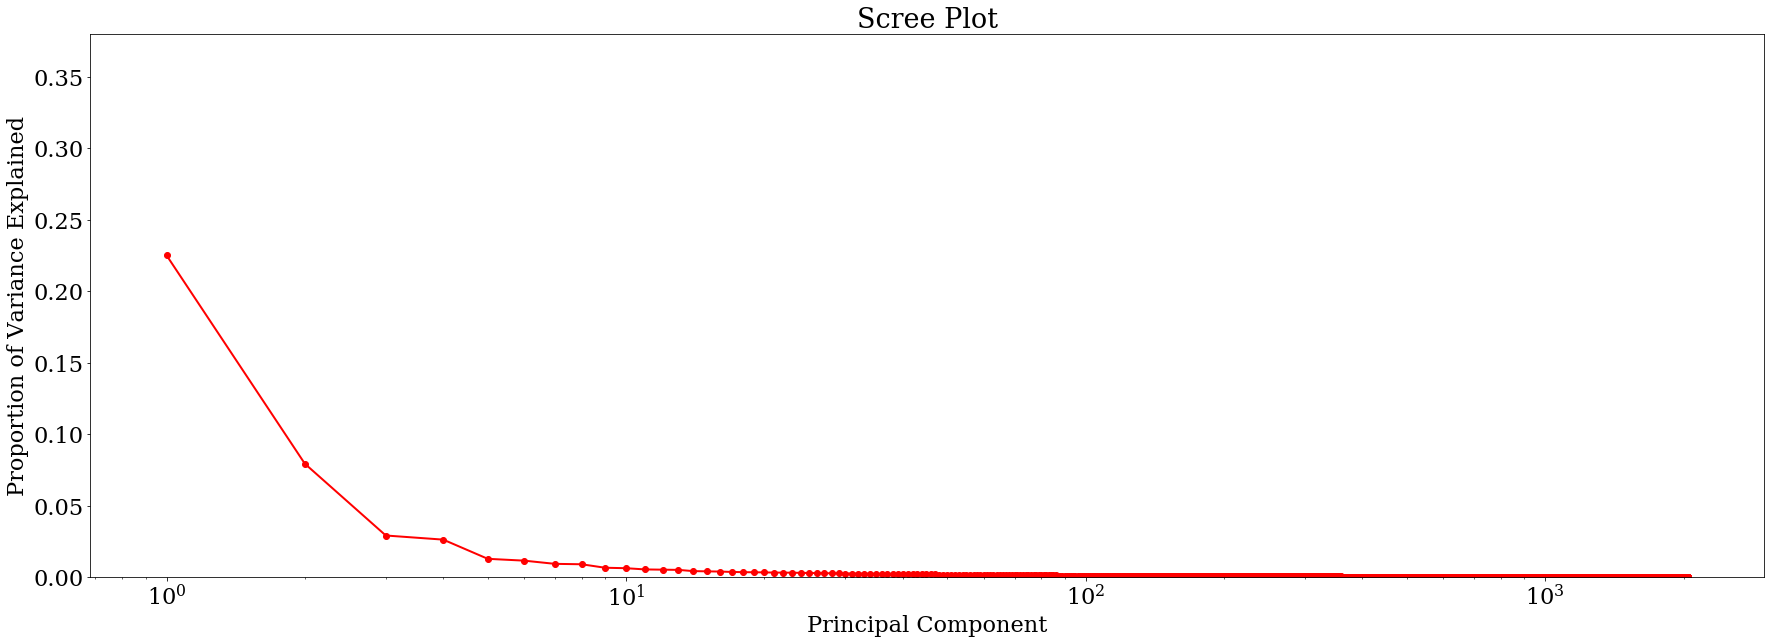

In [8]:
fig, ax = plt.subplots(figsize=(30,10))

ax.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
ax.set_title('Scree Plot')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')
ax.set_xscale("log")
ax.set_ylim(0,0.38)
print(" ")